Игнат Поух

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import scipy.special as sps
import warnings

In [33]:
bikeshare = pd.read_csv("bikeshare.csv")

In [34]:
bikeshare.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [35]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Для столбцов (temp, windspeed) в датасете bikeshare найдите среднее, дисперсию, 50, 75 и 90, 99 перцентили, моду. 
#### Какие выводы можно сделать?

In [58]:
# temp

bikeshare.temp.describe()[[1,2,5,6]]

mean    20.23086
std      7.79159
50%     20.50000
75%     26.24000
Name: temp, dtype: float64

In [74]:
print("90% percentile = " + str(np.percentile(bikeshare.temp, 90)))
print("99% percentile = " + str(np.percentile(bikeshare.temp, 99)))

90% percentile = 30.34
99% percentile = 36.08


In [78]:
bikeshare.temp.mode()

0    14.76
Name: temp, dtype: float64

In [83]:
bikeshare.temp.value_counts().head(5)

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
Name: temp, dtype: int64

Среднее и медиана показателя 'temp' примерно одинаковы (приблизительно = 20). 

Мода также не слишком сильно отклоняется от среднего значения (14.76)

99% наблюдений располагаются в пределах 3 стандартных отклонений. По данным признакам можем предположить, что распределение данных нормальное.

In [56]:
# windspeed

bikeshare.windspeed.describe().loc[['mean','std','50%','75%']]

mean    12.799395
std      8.164537
50%     12.998000
75%     16.997900
Name: windspeed, dtype: float64

In [79]:
print("90% percentile = " + str(np.percentile(bikeshare.windspeed, 90)))
print("99% percentile = " + str(np.percentile(bikeshare.windspeed, 99)))

90% percentile = 23.9994
99% percentile = 35.0008


In [80]:
bikeshare.windspeed.mode()

0    0.0
Name: windspeed, dtype: float64

In [82]:
bikeshare.windspeed.value_counts().head(5)

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
Name: windspeed, dtype: int64

Среднее и медиана показателя 'windspeed' примерно одинаковы (приблизительно = 12).

99% наблюдений располагаются в пределах 3 стандартных отклонений. По этим признакам распределение данных можеть быть нормальным.

Но мода сильно отличается от среднего и медианы (мода 0, среднее/медиана = 12). Распределение может быть ассиметричным, а значит ненормальным.

#### Постройте гистограммы распределения в датасете при помощи метода датафрейма hist(). 
#### При необходимости добавьте логарифмированную ось для каких-то переменных (параметр log) - преобразование переменной.Стало ли распределение более симметричным?

<AxesSubplot:>

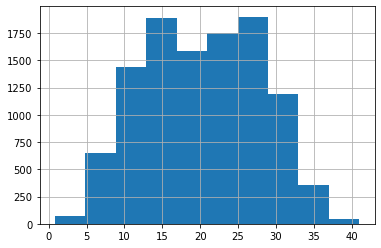

In [85]:
bikeshare.temp.hist(figsize = (6,4))

<AxesSubplot:>

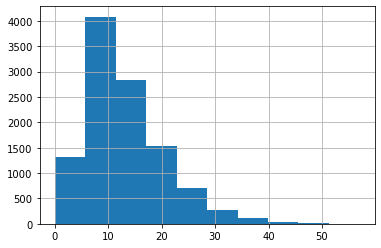

In [86]:
bikeshare.windspeed.hist(figsize = (6,4))

In [87]:
# Ассиметрия (д.б. от -0.5 до 0.5)
skew(bikeshare.windspeed)

0.5886853963635482

<AxesSubplot:>

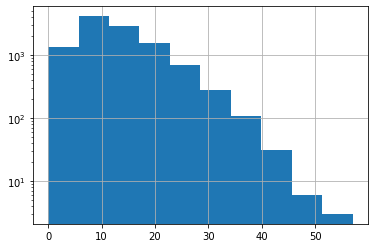

In [115]:
bikeshare.windspeed.hist(figsize = (6,4), log = True)

После логарифмизации визуально ассиметрия уменьшилась, но при средней равной приблизительно 12 наблюдается перекос по наблюдениям со значениями 15-50 (распределение на графике на участке вправо от средней)

#### Постройте симметричный доверительный интервал для метрики temp при доверительной вероятности 0.95. Какие выводы об аномальных событиях можно сделать?
#### Найдите количество значений, выходящих за три сигмы этой метрики.

In [116]:
def my_norm_confidence(df=bikeshare, column = "temp", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [117]:
confidence = my_norm_confidence()
print(confidence)

(4.959624343428603, 35.502095296475744)


Text(0.5, 1.0, 'Доверительный интервал')

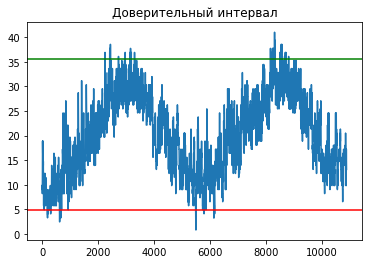

In [118]:
bikeshare.temp.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

In [134]:
bikeshare.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [133]:
# По наблюдаемым данным, значения выходящие за рамки 3 сигм этой метрики должны быть < -3.14
# Если значение min по 'temp' - 0.82, значит значений выходящих за рамки 3 сигм нет

q = bikeshare.temp.mean()-3*bikeshare.temp.std()
q

-3.1439097120103447

In [135]:
# По наблюдаемым данным, значения выходящие за рамки 3 сигм этой метрики должны быть > 43.6
# Если значение max по 'temp' - 41, значит значений выходящих за рамки 3 сигм нет

k = bikeshare.temp.mean()+3*bikeshare.temp.std()
k

43.605629351914686